# Forecasting in Time Series - Air Passengers Data
1. Split the air passenger data into a train/validation/test part
2. Learn a forecast model on the train part
3. Create a forecast for the full validation fold with the model
4. Visualize the forecast together with the true data in the validation of the data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('../data/air_passengers.csv')
df['Month'] = pd.to_datetime(df['Month']) # convert to datetime

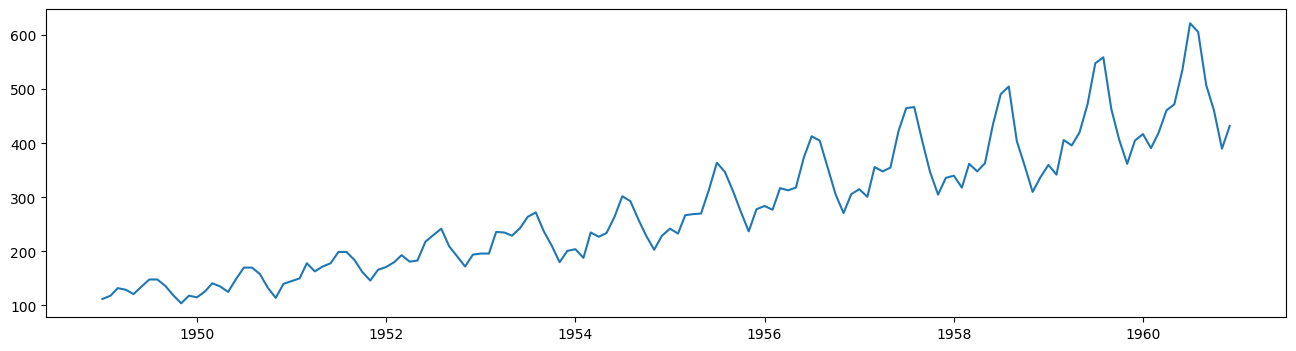

In [90]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(df['Month'],df['#Passengers'])
plt.show()

1. Split the air passengers data into train/validaition/test part

In [91]:
# split data into train, validation and test (60%, 20%, 20%)
train, validation, test = np.split(df, [int(.6*len(df)), int(.8*len(df))])

/Users/nicolaycc/miniconda3/envs/machinelearning/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


En este caso no tiene sentido utilizar un sklearn.

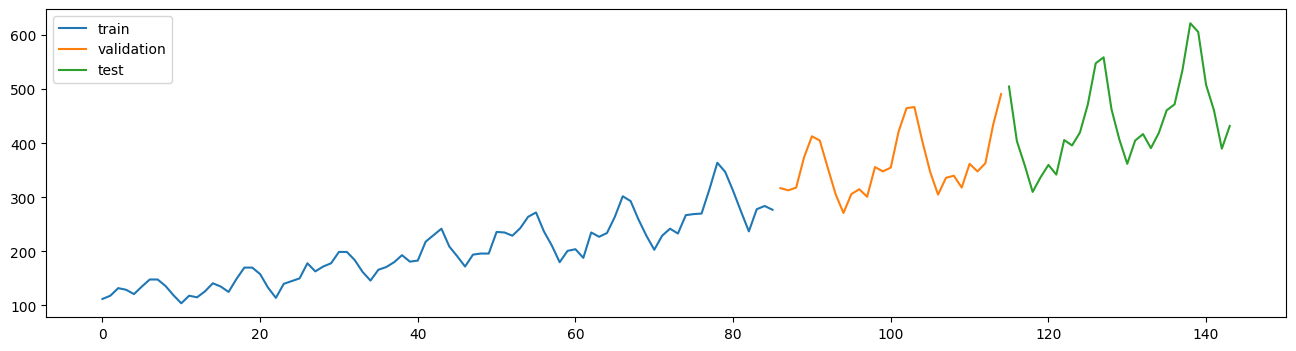

In [92]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(train['#Passengers'],label='train')
ax.plot(validation['#Passengers'],label='validation')
ax.plot(test['#Passengers'],label='test')
plt.legend()
plt.show()

2. Learn a forecast model on the train part

Para realizar el forecast descomponemos la serie de tiempo en sus componentes y predecimos por separado

In [93]:
# Trend
train['rolling_mean'] = train['#Passengers'].rolling(window=12).mean()

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train=train[['Month']] #X should be a series
X_test=validation[['Month']] #X should be a series
y_train=train['#Passengers']
y_test=validation['#Passengers']

model.fit(X_train,y_train)

LinearRegression()

In [95]:
prediction = model.predict(validation[['Month']].astype(int))

In [96]:
prediction_df = pd.DataFrame({'Month': X_test.squeeze(), '#Passengers': prediction.squeeze()}, index=X_test.index)
prediction_df

,Month,#Passengers
86,1956-03-01,291.821618
87,1956-04-01,293.989218
88,1956-05-01,296.086896
89,1956-06-01,298.254496
90,1956-07-01,300.352174
91,1956-08-01,302.519774
92,1956-09-01,304.687374
93,1956-10-01,306.785052
94,1956-11-01,308.952652
95,1956-12-01,311.050330


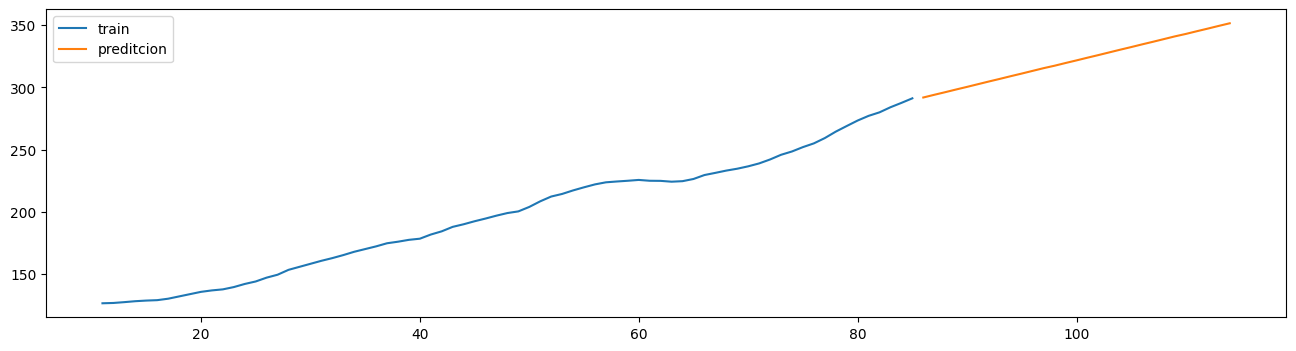

In [97]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(train['rolling_mean'],label='train')
ax.plot(prediction_df['#Passengers'],label='preditcion')
plt.legend()
plt.show()